# Faircent

Faircent is a lending and borrowing platform in the p2p lending space.

In [1]:
# Load necessary libraries
import sys
import glob
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import gensim
import spacy
import numpy as np
import tqdm.notebook as tqdm
from pprint import pprint
import pickle
import plotly.express as px
import pyLDAvis

sys.path.append('/Users/pushkar/Documents/projects/fin_comp/comp/docs')

import utils.helper
from utils.helper import Processor
import importlib
importlib.reload(utils.helper)

<module 'utils.helper' from '/Users/pushkar/Documents/projects/fin_comp/comp/docs/utils/helper.py'>

In [2]:
# Load data
df = pd.read_csv('./../../data/fintech/faircent/faircent.csv')

In [3]:
# Know the shape of the loaded data
df.shape

(321, 27)

## Preprocessing

In [4]:
processor = Processor('./../../data/config.json')

In [5]:
# Preprocess the data
pre_df, post_df = processor.preprocess(df)

In [6]:
# Create dictionaries
pre_id2word = gensim.corpora.Dictionary(pre_df['bigram'].values.tolist())
post_id2word = gensim.corpora.Dictionary(post_df['bigram'].values.tolist())

In [7]:
# Create corpus
pre_corpus = [pre_id2word.doc2bow(text) for text in pre_df['bigram'].values.tolist()]
post_corpus = [post_id2word.doc2bow(text) for text in post_df['bigram'].values.tolist()]

## Base Model

### Training

In [8]:
pre_lda_model = gensim.models.LdaMulticore(corpus=pre_corpus,
                                        id2word=pre_id2word,
                                        num_topics=10,
                                        random_state=42,
                                        chunksize=100,
                                        passes=10,
                                        per_word_topics=True)

In [9]:
pprint(pre_lda_model.print_topics())
pre_doc_lda = pre_lda_model[pre_corpus]

[(0,
  '0.017*"coo" + 0.017*"vinay" + 0.017*"founder" + 0.017*"mathews" + '
  '0.012*"lending" + 0.012*"like" + 0.012*"money" + 0.012*"collection" + '
  '0.012*"lenders" + 0.012*"smes"'),
 (1,
  '0.018*"platform" + 0.014*"check" + 0.014*"number" + 0.014*"borrower" + '
  '0.009*"debited" + 0.009*"register" + 0.009*"trusted" + 0.009*"lacs" + '
  '0.009*"withdraw" + 0.009*"deposit"'),
 (2,
  '0.024*"capital" + 0.019*"lending_platform" + 0.019*"raises" + 0.015*"money" '
  '+ 0.015*"undisclosed" + 0.015*"borrowers" + 0.015*"sum" + 0.015*"led_das" + '
  '0.015*"capital_gunosy" + 0.010*"lender"'),
 (3,
  '0.014*"credit" + 0.014*"thank" + 0.014*"retail" + 0.014*"investrs" + '
  '0.014*"ties" + 0.014*"economic" + 0.014*"times" + 0.007*"platform" + '
  '0.007*"like" + 0.007*"website"'),
 (4,
  '0.043*"raises_fresh" + 0.038*"capital" + 0.038*"led_das" + '
  '0.038*"capital_gunosy" + 0.038*"funding_investors" + 0.033*"online" + '
  '0.033*"personal_loans" + 0.022*"india" + 0.011*"best" + 0.011*"fa

In [10]:
post_lda_model = gensim.models.LdaMulticore(corpus=post_corpus,
                                        id2word=post_id2word,
                                        num_topics=10,
                                        random_state=42,
                                        chunksize=100,
                                        passes=10,
                                        per_word_topics=True)

In [11]:
pprint(post_lda_model.print_topics())
post_doc_lda = post_lda_model[post_corpus]

[(0,
  '0.034*"lockdown_loans" + 0.034*"launches_anti" + 0.034*"help_ease" + '
  '0.031*"liquidity_pressure" + 0.031*"amid_covid" + 0.013*"recovery" + '
  '0.012*"new" + 0.010*"loan" + 0.009*"covid" + 0.007*"india"'),
 (1,
  '0.030*"lending" + 0.025*"india" + 0.017*"like" + 0.017*"loan" + '
  '0.014*"covid" + 0.011*"company" + 0.011*"fullerton" + 0.011*"dawn" + '
  '0.009*"business" + 0.009*"rate"'),
 (2,
  '0.018*"loan" + 0.011*"money" + 0.011*"hours" + 0.008*"new" + '
  '0.008*"lending" + 0.008*"business" + 0.008*"action" + 0.008*"indias" + '
  '0.008*"apply" + 0.008*"dont"'),
 (3,
  '0.019*"loan" + 0.013*"today" + 0.010*"present" + 0.010*"message" + '
  '0.010*"ceo" + 0.010*"people" + 0.010*"dm" + 0.010*"emi" + 0.010*"madam" + '
  '0.005*"fund"'),
 (4,
  '0.021*"invest" + 0.021*"money_request" + 0.021*"sumit" + 0.021*"money_rm" + '
  '0.021*"feb_receiving" + 0.021*"seminar_convinced" + 0.021*"dad_yrs" + '
  '0.021*"team_act" + 0.021*"hw_dad" + 0.021*"promptly_rgds"'),
 (5,
  '0.022*

### Evaluation

In [12]:
pre_coherence_model_lda = gensim.models.CoherenceModel(model=pre_lda_model, 
                                                    texts=pre_df['bigram'].values.tolist(), 
                                                    dictionary=pre_id2word, 
                                                    coherence='u_mass')
pre_coherence_lda = pre_coherence_model_lda.get_coherence()
print('Pre-COVID Coherence Score: ', pre_coherence_lda)

Pre-COVID Coherence Score:  -15.807358705939425


In [13]:
post_coherence_model_lda = gensim.models.CoherenceModel(model=post_lda_model, 
                                                    texts=post_df['bigram'].values.tolist(), 
                                                    dictionary=post_id2word, 
                                                    coherence='u_mass')
post_coherence_lda = post_coherence_model_lda.get_coherence()
print('Post-COVID Coherence Score: ', post_coherence_lda)

Post-COVID Coherence Score:  -13.677153194018263


## Hyper-parameter tuning

### Pre-COVID

In [14]:
pre_df_result = processor.perform_hyperparameter_tuning(pre_corpus, 
                                                        pre_id2word, 
                                                        pre_df['bigram'].values.tolist(), 
                                                        "./../../data/fintech/faircent/pre.csv")

100%|██████████| 780/780 [20:27<00:00,  1.57s/it]


In [15]:
# pre_df_result = pd.read_csv("./../../data/fintech/faircent/pre.csv")

In [16]:
# Maximum coherence
pre_df_result.sort_values('Coherence', ascending=False, inplace=True)
pre_df_result.head(10)

,Validation_Set,Topics,Alpha,Beta,Coherence
313,75.0% Corpus,12,0.61,0.9099999999999999,-9.916415
373,75.0% Corpus,14,0.61,0.9099999999999999,-10.222609
358,75.0% Corpus,13,asymmetric,0.9099999999999999,-10.849145
353,75.0% Corpus,13,symmetric,0.9099999999999999,-11.334354
88,75.0% Corpus,4,asymmetric,0.9099999999999999,-11.403820
208,75.0% Corpus,8,asymmetric,0.9099999999999999,-11.488808
372,75.0% Corpus,14,0.61,0.61,-11.509053
748,100% Corpus,13,asymmetric,0.9099999999999999,-11.608290
352,75.0% Corpus,13,symmetric,0.61,-11.677266
388,75.0% Corpus,14,asymmetric,0.9099999999999999,-11.678830


In [43]:
pre_ts_df = processor.create_topic_df(pre_df_result[pre_df_result['Validation_Set'] == '100% Corpus'], 
                                        'asymmetric',
                                        '0.9099999999999999')

<AxesSubplot: title={'center': 'Coherence Plot'}, xlabel='topics'>

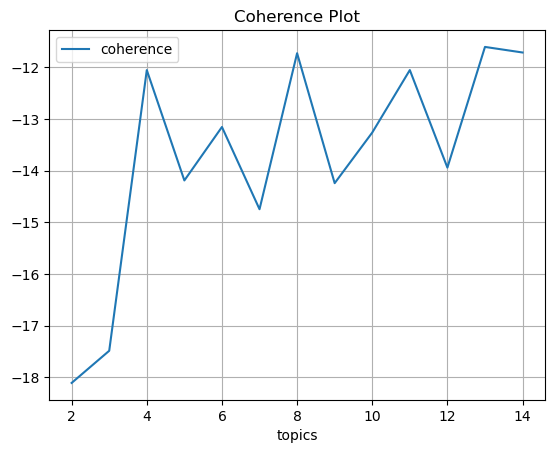

In [44]:
pre_ts_df.plot.line(x='topics', y='coherence', title='Coherence Plot', grid = True)

In [45]:
fig = px.line(pre_ts_df, x='topics', y='coherence', title='Coherence plot')
fig.show()

/Users/pushkar/miniforge3/envs/project/lib/python3.8/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/Users/pushkar/miniforge3/envs/project/lib/python3.8/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



For pre-COVID period, there are two points 10 and 3 where are coherence score is close to 0. But for the initial analysis, 3 will be chosen.

In [46]:
pre_df_result[pre_df_result['Topics'] == 4].head(5)

,Validation_Set,Topics,Alpha,Beta,Coherence
88,75.0% Corpus,4,asymmetric,0.9099999999999999,-11.403820
478,100% Corpus,4,asymmetric,0.9099999999999999,-12.056595
89,75.0% Corpus,4,asymmetric,symmetric,-15.648894
86,75.0% Corpus,4,asymmetric,0.31,-16.012644
476,100% Corpus,4,asymmetric,0.31,-16.179252


### Post-COVID

In [21]:
post_df_result = processor.perform_hyperparameter_tuning(post_corpus, 
                                                        post_id2word, 
                                                        post_df['bigram'].values.tolist(), 
                                                        "./../../data/fintech/faircent/post.csv")

100%|██████████| 780/780 [20:26<00:00,  1.57s/it]


In [22]:
# post_df_result = pd.read_csv("./../../data/fintech/faircent/post.csv")

In [23]:
# Maximum coherence
post_df_result.sort_values('Coherence', ascending=False, inplace=True)
post_df_result.head(10)

,Validation_Set,Topics,Alpha,Beta,Coherence
148,75.0% Corpus,6,asymmetric,0.9099999999999999,-9.456957
733,100% Corpus,13,0.61,0.9099999999999999,-10.058343
343,75.0% Corpus,13,0.61,0.9099999999999999,-10.193133
762,100% Corpus,14,0.61,0.61,-10.242398
227,75.0% Corpus,9,0.9099999999999999,0.61,-10.319428
673,100% Corpus,11,0.61,0.9099999999999999,-10.585705
763,100% Corpus,14,0.61,0.9099999999999999,-10.589099
228,75.0% Corpus,9,0.9099999999999999,0.9099999999999999,-10.649365
732,100% Corpus,13,0.61,0.61,-10.747478
287,75.0% Corpus,11,0.9099999999999999,0.61,-10.879782


In [47]:
post_ts_df = processor.create_topic_df(post_df_result[post_df_result['Validation_Set'] == '100% Corpus'], 
                                        '0.61',
                                        '0.9099999999999999')

<AxesSubplot: title={'center': 'Coherence Plot'}, xlabel='topics'>

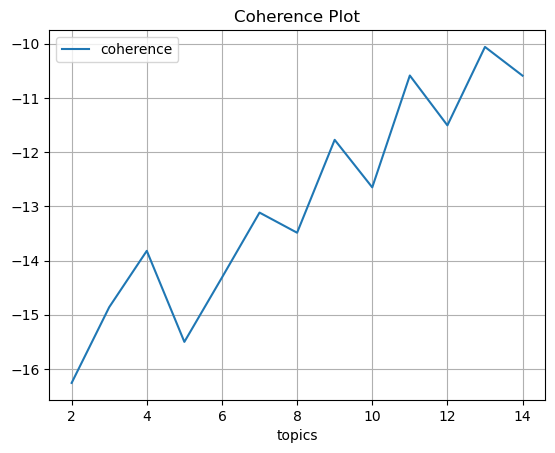

In [48]:
post_ts_df.plot.line(x='topics', y='coherence', title='Coherence Plot', grid = True)

In [49]:
fig = px.line(post_ts_df, x='topics', y='coherence', title='Coherence plot')
fig.show()

/Users/pushkar/miniforge3/envs/project/lib/python3.8/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/Users/pushkar/miniforge3/envs/project/lib/python3.8/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



For the post-COVID period, the model with a number of topics equal to 2 gives the best coherence score.

In [50]:
post_df_result[(post_df_result['Topics'] == 4)].head()

,Validation_Set,Topics,Alpha,Beta,Coherence
468,100% Corpus,4,0.9099999999999999,0.9099999999999999,-12.447833
467,100% Corpus,4,0.9099999999999999,0.61,-12.970225
75,75.0% Corpus,4,0.9099999999999999,0.01,-13.510543
457,100% Corpus,4,0.31,0.61,-13.782023
456,100% Corpus,4,0.31,0.31,-13.785544


## Final Models

### Pre-COVID

In [51]:
pre_final_lda_model = gensim.models.LdaMulticore(corpus=pre_corpus,
                                        id2word=pre_id2word,
                                        num_topics=4,
                                        random_state=100,
                                        chunksize=100,
                                        passes=10,
                                        per_word_topics=True,
                                        alpha='asymmetric',
                                        eta=0.91)

In [52]:
pre_final_coherence_model_lda = gensim.models.CoherenceModel(model=pre_final_lda_model, 
                                                    texts=pre_df['bigram'].values.tolist(), 
                                                    dictionary=pre_id2word, 
                                                    coherence='u_mass')
pre_final_coherence_lda = pre_final_coherence_model_lda.get_coherence()
print('Pre-COVID Coherence Score: ', pre_final_coherence_lda)

Pre-COVID Coherence Score:  -12.05659473633844


### Post-COVID

In [80]:
post_final_lda_model = gensim.models.LdaMulticore(corpus=post_corpus,
                                        id2word=post_id2word,
                                        num_topics=3,
                                        random_state=100,
                                        chunksize=100,
                                        passes=10,
                                        per_word_topics=True,
                                        alpha=0.61,
                                        eta=0.61)

In [81]:
post_final_coherence_model_lda = gensim.models.CoherenceModel(model=post_final_lda_model, 
                                                    texts=post_df['bigram'].values.tolist(), 
                                                    dictionary=post_id2word, 
                                                    coherence='u_mass')
post_final_coherence_lda = post_final_coherence_model_lda.get_coherence()
print('Post-COVID Coherence Score: ', post_final_coherence_lda)

Post-COVID Coherence Score:  -14.763927305609569


## Inferencing

### Pre-COVID

In [57]:
pre_df_topic_sents_keywords = processor.dominant_topics(ldamodel=pre_final_lda_model, 
                                                         corpus=pre_corpus, 
                                                         texts=pre_df['bigram'].values.tolist(),
                                                         tweets=pre_df['tweet'].values.tolist())

In [58]:
pre_df_topic_sents_keywords

,Dominant_Topic,Perc_Contribution,Topic_Keywords,Text
0,1,0.9486,"platform, india, online, personal_loans, borro...","Thrilled to have @rajatgandhi , CEO of Faircen..."
1,0,0.8773,"lending, capital, wishes, loan, led_das, capit...",https://t.co/MwUT0HD6iu launches book on #P2P...
2,0,0.8976,"lending, capital, wishes, loan, led_das, capit...",Faircent launches book on P2P lending ‘Every P...
3,0,0.8976,"lending, capital, wishes, loan, led_das, capit...",Faircent launches book on P2P lending ‘Every P...
4,0,0.8976,"lending, capital, wishes, loan, led_das, capit...",Faircent launches book on P2P lending ‘Every P...
...,...,...,...,...
133,0,0.7951,"lending, capital, wishes, loan, led_das, capit...",Faircent ties up with Cube Wealth https://t.co...
134,0,0.7951,"lending, capital, wishes, loan, led_das, capit...",Faircent ties up with Cube Wealth https://t.co...
135,0,0.7951,"lending, capital, wishes, loan, led_das, capit...",Faircent ties up with Cube Wealth https://t.co...
136,0,0.7951,"lending, capital, wishes, loan, led_das, capit...",Faircent ties up with Cube Wealth https://t.co...


In [59]:
pre_df_topic_sents_keywords['Topic_Keywords'].unique()

array(['platform, india, online, personal_loans, borrower, lending_platform, based, firm, borrowers, loans',
       'lending, capital, wishes, loan, led_das, capital_gunosy, money, wealth, ties_cube, raises_fresh',
       'lending, market, listed, invest, credit, valued, having, share, prices, reasonably',
       'account, dot, forego, closedelete, gmail, kohad, wish, delete, fully, active'],
      dtype=object)

Topics that can be inferred are:

1. Topic Number: 0
   - Probable topic title: Products and Services
   - Key terms: 'platform, india, online, personal_loans, borrower, lending_platform, based, firm, borrowers, loans'

<br>

2. Topic Number: 1
   - Probable topic title: Fund Raising
   - Key terms: 'lending, capital, wishes, loan, led_das, capital_gunosy, money, wealth, ties_cube, raises_fresh'

<br>

3. Topic Number: 2
   - Probable topic title: Issues
   - Key terms: 'lending, market, listed, invest, credit, valued, having, share, prices, reasonably'

<br>

4. Topic Number: 3
   - Probable topic title: *Not a good topic* *Only 2 tweets are classified into this*
   - Key terms: 'account, dot, forego, closedelete, gmail, kohad, wish, delete, fully, active'

In [62]:
pre_dist, fig = processor.plot_topic_distribution(pre_df_topic_sents_keywords)
fig.show()

/Users/pushkar/miniforge3/envs/project/lib/python3.8/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/Users/pushkar/miniforge3/envs/project/lib/python3.8/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



[Text(0, 0, '114'), Text(0, 0, '18'), Text(0, 0, '5'), Text(0, 0, '1')]

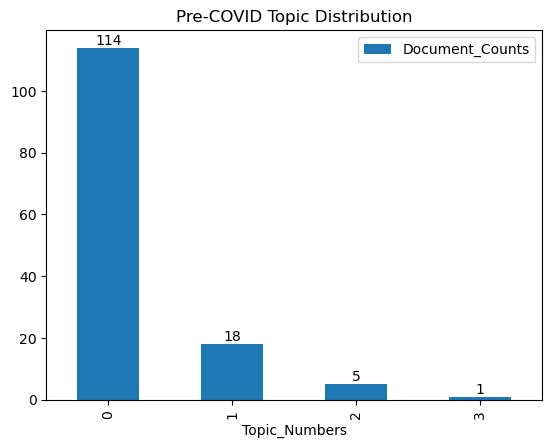

In [63]:
ax = pre_dist.plot.bar(x='Topic_Numbers', y='Document_Counts', title='Pre-COVID Topic Distribution')
ax.bar_label(ax.containers[0])

All the topics have almost equal distribution. This can be one of the signals that the company is conscious of its social media presence.

### Post-COVID

In [82]:
post_df_topic_sents_keywords = processor.dominant_topics(
   ldamodel=post_final_lda_model, corpus=post_corpus, texts=post_df['bigram'].values.tolist(), tweets=post_df['tweet'].values.tolist()
)

In [83]:
post_df_topic_sents_keywords

,Dominant_Topic,Perc_Contribution,Topic_Keywords,Text
0,0,0.9285,"emi, company, loan, pm, lender, action, global...","@Faircent1 don't blame this economic downturn,..."
1,2,0.8593,"lending, team, collection, like, good, bank, m...",We understand that keeping a business afloat d...
2,0,0.9227,"emi, company, loan, pm, lender, action, global...","This Christmas, we wish that you along with yo..."
3,2,0.8608,"lending, team, collection, like, good, bank, m...",@Pravinkks @VjaCityPolice @Faircent is one of ...
4,2,0.9563,"lending, team, collection, like, good, bank, m...",@PMOIndia Respected Sir.....\nApke banaye hue ...
...,...,...,...,...
152,1,0.6828,"lending, lockdown_loans, launches_anti, help_e...",@zmilap @ketto @Paytmcare @FairCent @GiveIndia...
153,1,0.7244,"lending, lockdown_loans, launches_anti, help_e...",#Faircent it's not #bestpractise to #pulldown...
154,0,0.9507,"emi, company, loan, pm, lender, action, global...","A discussion among Alok Mittal, Co-Founder &am..."
155,0,0.9454,"emi, company, loan, pm, lender, action, global...","Session underway @IAMAIForum with Alok Mittal,..."


In [84]:
post_df_topic_sents_keywords['Topic_Keywords'].unique()

array(['emi, company, loan, pm, lender, action, global_adhil, mathews_seema, pm_pm, prem_fia',
       'lending, team, collection, like, good, bank, moratorium, time, india, pls',
       'lending, lockdown_loans, launches_anti, help_ease, amid_covid, liquidity_pressure, covid, loans, loan, invest'],
      dtype=object)

In [85]:
post_df_topic_sents_keywords[post_df_topic_sents_keywords['Topic_Keywords']=='emi, company, loan, pm, lender, action, global_adhil, mathews_seema, pm_pm, prem_fia']['Text'].values[:10]

array(["@Faircent1 don't blame this economic downturn,before this faircent didn't do their work in proper way.Even not a single step taken by faircent against borrowers ,who has not paid their single emi since disbursement of loan,if u want detail I can share u the same.",
       'This Christmas, we wish that you along with your family grow and access new opportunities &amp; immense prosperity that the coming year hopes to bring.\xa0Wishing you a Merry Christmas and a Happy New Year!\n\n#Faircent #MerryChristmas #ChristmasGreetings #NewYear2021 https://t.co/lLDkHO7nIt',
       '@Faircent1 @rajatgandhi Fucked up Faircent action is to remove so-called Pessimistic return from their dashboard, which is the most realistic return from Faircent.\nPure marketing and shit management.\n#BoycottFaircent #TransparencyIsMyth https://t.co/fWdYPxKTtI',
       '@Pravinkks @IAMAIForum @tandonrakshit One of my NBFC "faircent" is continually blackmailing me of depositing my blank cheques with full amount

Topics that can be inferred are:

1. Topic Number: 0
   - Probable topic title: General Issues
   - Key terms: 'emi, company, loan, pm, lender, action, global_adhil, mathews_seema, pm_pm, prem_fia'

<br>

2. Topic Number: 1
   - Probable topic title: Extreme Service Dissatisfaction
   - Key terms: 'lending, team, collection, like, good, bank, moratorium, time, india, pls'

<br>

3. Topic Number: 2
   - Probable topic title: Customer Ask
   - Key terms: 'lending, lockdown_loans, launches_anti, help_ease, amid_covid, liquidity_pressure, covid, loans, loan, invest'

In [88]:
post_dist, fig = processor.plot_topic_distribution(post_df_topic_sents_keywords)
fig.show()

/Users/pushkar/miniforge3/envs/project/lib/python3.8/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/Users/pushkar/miniforge3/envs/project/lib/python3.8/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



[Text(0, 0, '58'), Text(0, 0, '53'), Text(0, 0, '46')]

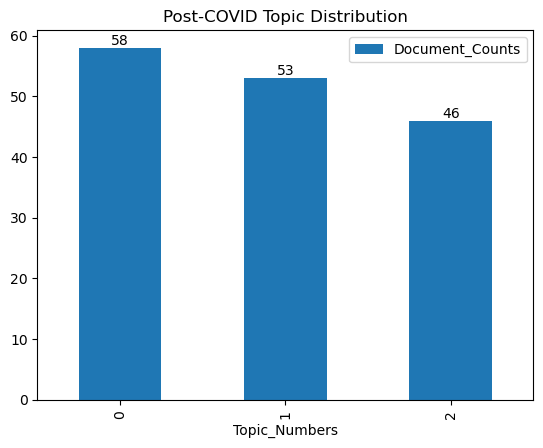

In [89]:
ax = post_dist.plot.bar(x='Topic_Numbers', y='Document_Counts', title='Post-COVID Topic Distribution')
ax.bar_label(ax.containers[0])

More and more people are trying to communicate with the company through Twitter.

In [90]:
# Save outputs
pre_df_topic_sents_keywords.to_csv('./../../data/fintech/faircent/faircent_pre_output.csv', index=True)
post_df_topic_sents_keywords.to_csv('./../../data/fintech/faircent/faircent_post_output.csv', index=True)